# polynomial fit 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### load atlanta july temperature data 

In [2]:
atl=np.genfromtxt('DATA/atlanta_temperature.tsv',delimiter='\t')
year=atl[70:140,0]
july=atl[70:140,7]

### quick look at the data

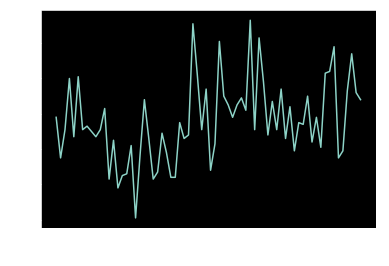

In [3]:
plt.plot(year,july);
plt.xlabel('time')
plt.ylabel('july temp, deg F');

### fit polynomial using pseudoinverse matrix

In [4]:
E=np.ones((70,6))
x0=(year-np.mean(year))/np.std(year)  ## standardize x axis
E[:,0]=x0**5
E[:,1]=x0**4
E[:,2]=x0**3
E[:,3]=x0**2
E[:,4]=x0**1
EEinv=np.linalg.inv(np.dot(np.transpose(E),E))
avec=np.dot(EEinv,np.dot(np.transpose(E),july))

[ 0.85170265  0.80563384 -3.55031779 -1.92014154  3.90786659 80.05896673]


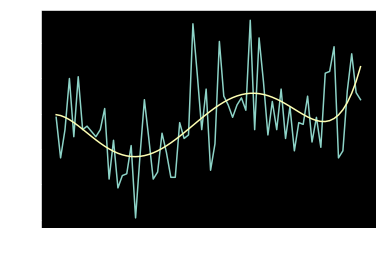

In [5]:
print(avec)
yest=np.dot(E,avec)
plt.plot(year,july)
plt.plot(year,yest)
plt.xlabel('time')
plt.ylabel('july temp, deg F');

### let's use np.polyfit function

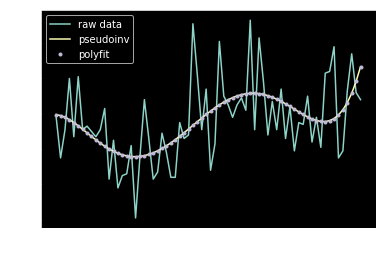

In [6]:
K=5;
coeff=np.polyfit(x0,july,K)
yest2=np.polyval(coeff,x0)
plt.plot(year,july)
plt.plot(year,yest,'-')
plt.plot(year,yest2,'.')
plt.legend(('raw data','pseudoinv','polyfit'))
plt.xlabel('time')
plt.ylabel('july temp, deg F');

In [ ]:
print(coeff)
print(avec)